In [1]:
from uav_radio import PathLossCalculator # Replace absolute path by uav_radio
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

frequency = 800000000
calculator = PathLossCalculator(reference_distance=1.0)
calculator.two_ray_pl

<bound method PathLossCalculator.two_ray_pl of <uav_radio.uav_radio.PathLossCalculator object at 0x000001FB5018ED60>>

# First example
R. Amorim, H. Nguyen, P. Mogensen, I. Z. Kovács, J. Wigard and T. B. Sørensen, "Radio Channel Modeling for UAV Communication Over Cellular Networks," in IEEE Wireless Communications Letters, vol. 6, no. 4, pp. 514-517, Aug. 2017, doi: 10.1109/LWC.2017.2710045.
https://ieeexplore.ieee.org/document/7936620

![Radio channel modeling at different heights in lightly hilly rural](https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5962382/8013875/7936620/amori3-2710045-large.gif "Radio channel modeling at different heights in lightly hilly rural") ![Radio channel modeling at different heights in lightly hilly rural table](https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5962382/8013875/7936620/amori.t2-2710045-large.gif "Radio channel modeling at different heights in lightly hilly rural")



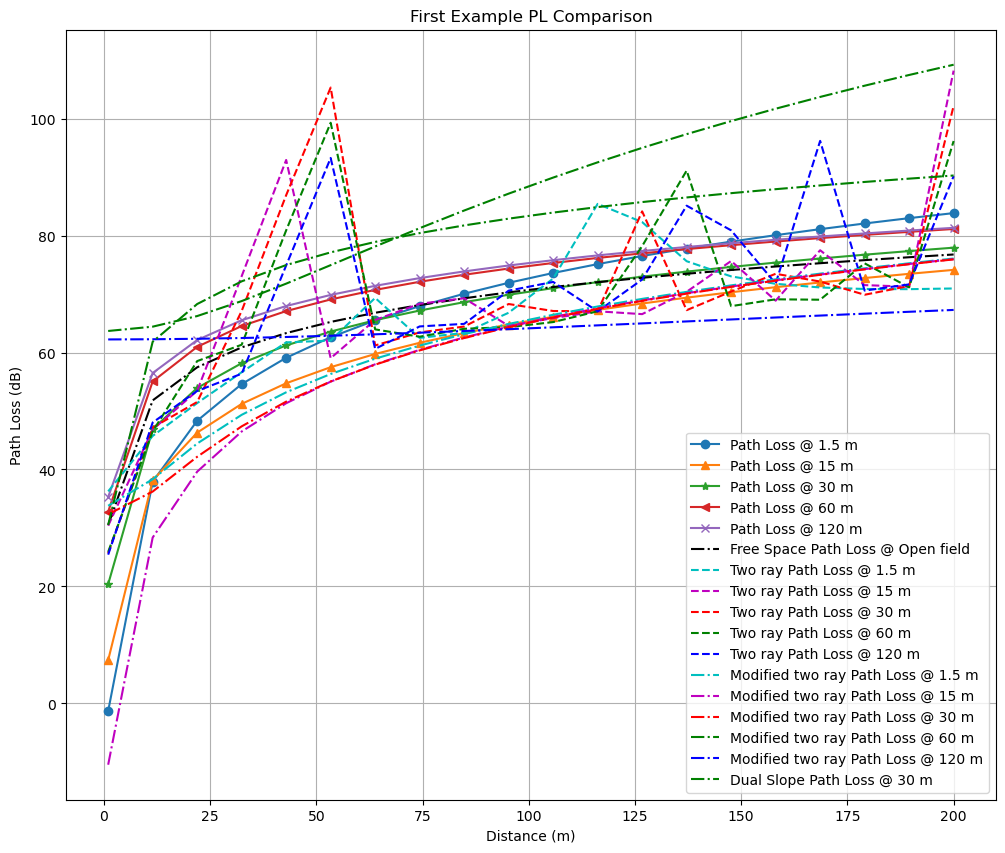

In [16]:
distances = np.linspace(1, 200, 20)

# Lists to store path loss and sigma values
path_losses_1_5, path_losses_15, path_losses_30, path_losses_60, path_losses_120 = [], [], [], [], []
free_space_pl = []
two_ray_pl_1_5, two_ray_pl_15, two_ray_pl_30, two_ray_pl_60, two_ray_pl_120 = [], [], [], [], []
modified_two_ray_pl_1_5, modified_two_ray_pl_15, modified_two_ray_pl_30, modified_two_ray_pl_60, modified_two_ray_pl_120 = [], [], [], [], []
dual_slope_pl_30 = []
sigmas = [7.7, 6.2, 5.2, 4.4, 3.4]

# Calculate path loss and sigma for each distance
for distance in distances:
    path_losses_1_5.append(calculator.log_distance_alpha_beta_pl(distance, frequency, scenario="lightly_hilly_rural", rx_height=1.5)[0])
    path_losses_15.append(calculator.log_distance_alpha_beta_pl(distance, frequency, scenario="lightly_hilly_rural", rx_height=15)[0])
    path_losses_30.append(calculator.log_distance_alpha_beta_pl(distance, frequency, scenario="lightly_hilly_rural", rx_height=30)[0])
    path_losses_60.append(calculator.log_distance_alpha_beta_pl(distance, frequency, scenario="lightly_hilly_rural", rx_height=60)[0])
    path_losses_120.append(calculator.log_distance_alpha_beta_pl(distance, frequency, scenario="lightly_hilly_rural", rx_height=120)[0])
    free_space_pl.append(calculator.log_distance_pl(distance, frequency, scenario="open_field")[0])
    two_ray_pl_1_5.append(calculator.two_ray_pl(distance, frequency, h_t = 15, h_r=1.5)[0])
    two_ray_pl_15.append(calculator.two_ray_pl(distance, frequency, h_t = 15, h_r=15)[0])
    two_ray_pl_30.append(calculator.two_ray_pl(distance, frequency, h_t = 15, h_r=30)[0])
    two_ray_pl_60.append(calculator.two_ray_pl(distance, frequency, h_t = 15, h_r=60)[0])
    two_ray_pl_120.append(calculator.two_ray_pl(distance, frequency, h_t = 15, h_r=120)[0])
    modified_two_ray_pl_1_5.append(calculator.modified_two_ray_pl(distance, frequency, h_t = 15, h_r=1.5)[0])
    modified_two_ray_pl_15.append(calculator.modified_two_ray_pl(distance, frequency, h_t = 15, h_r=15)[0])
    modified_two_ray_pl_30.append(calculator.modified_two_ray_pl(distance, frequency, h_t = 15, h_r=30)[0])
    modified_two_ray_pl_60.append(calculator.modified_two_ray_pl(distance, frequency, h_t = 15, h_r=60)[0])
    modified_two_ray_pl_120.append(calculator.modified_two_ray_pl(distance, frequency, h_t = 15, h_r=120)[0])
    dual_slope_pl_30.append(calculator.dual_slope_pl(distance, frequency, gamma_1=0.74, gamma_2=2.29, default=30)[0])
    
    

# Plot the results
plt.figure(figsize=(12, 10))
plt.plot(distances, path_losses_1_5, label='Path Loss @ 1.5 m', marker='o')
plt.plot(distances, path_losses_15, label='Path Loss @ 15 m', marker='^')
plt.plot(distances, path_losses_30, label='Path Loss @ 30 m', marker='*')
plt.plot(distances, path_losses_60, label='Path Loss @ 60 m', marker='<')
plt.plot(distances, path_losses_120, label='Path Loss @ 120 m', marker='x')
plt.plot(distances, free_space_pl,  '-.k', label='Free Space Path Loss @ Open field')
plt.plot(distances, two_ray_pl_1_5,  '--c', label='Two ray Path Loss @ 1.5 m')
plt.plot(distances, two_ray_pl_15,  '--m', label='Two ray Path Loss @ 15 m')
plt.plot(distances, two_ray_pl_30,  '--r', label='Two ray Path Loss @ 30 m')
plt.plot(distances, two_ray_pl_60,  '--g', label='Two ray Path Loss @ 60 m')
plt.plot(distances, two_ray_pl_120,  '--b', label='Two ray Path Loss @ 120 m')
plt.plot(distances, modified_two_ray_pl_1_5,  '-.c', label='Modified two ray Path Loss @ 1.5 m')
plt.plot(distances, modified_two_ray_pl_15,  '-.m', label='Modified two ray Path Loss @ 15 m')
plt.plot(distances, modified_two_ray_pl_30,  '-.r', label='Modified two ray Path Loss @ 30 m')
plt.plot(distances, modified_two_ray_pl_60,  '-.g', label='Modified two ray Path Loss @ 60 m')
plt.plot(distances, modified_two_ray_pl_120,  '-.b', label='Modified two ray Path Loss @ 120 m')
plt.plot(distances, dual_slope_pl_30,  '-.g', label='Dual Slope Path Loss @ 30 m')
#plt.scatter(distances, sigmas, label='Sigma', color='red', marker='o')
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.title('First Example PL Comparison')
plt.legend()
plt.grid(True)
plt.show()

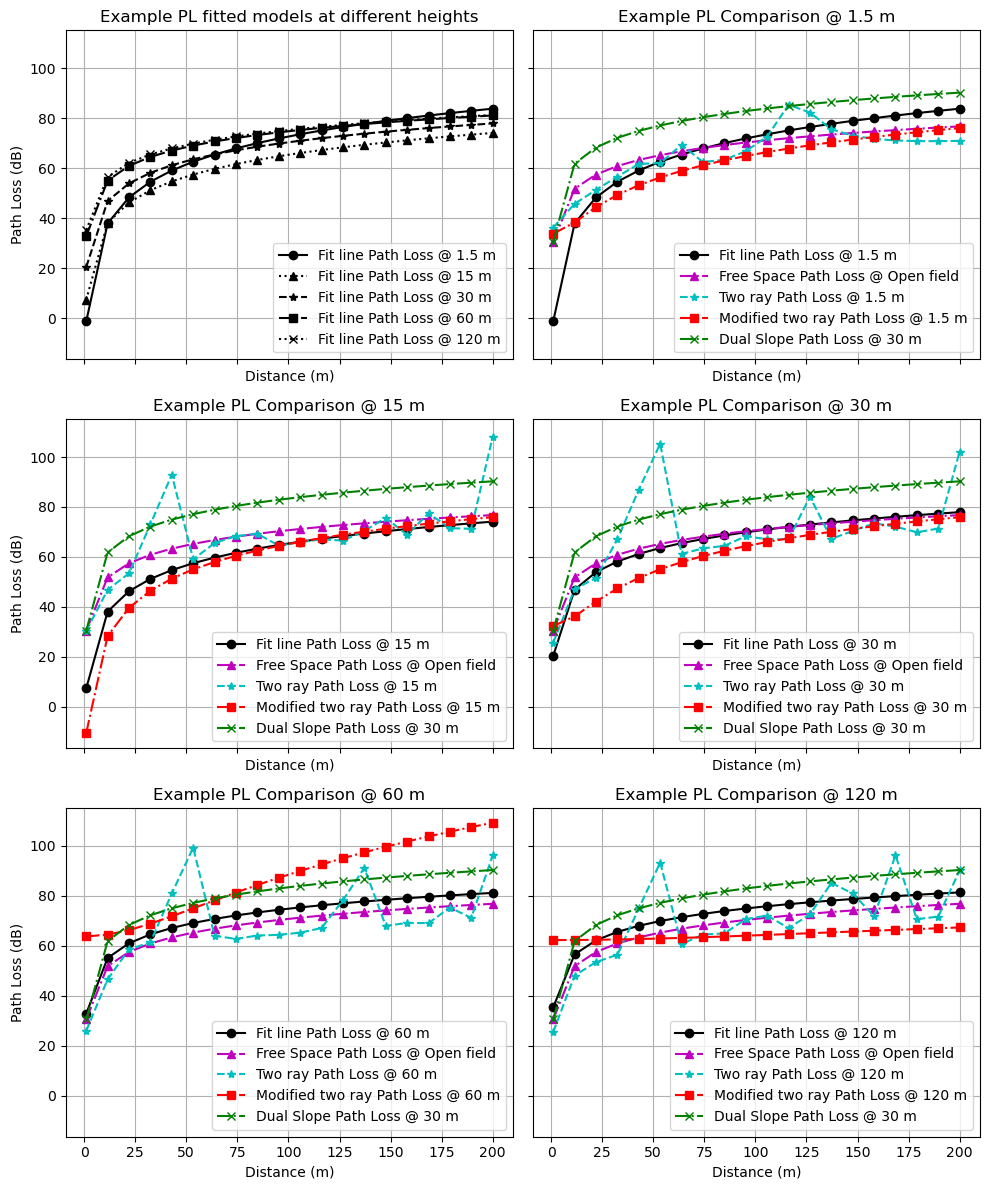

In [13]:

# Create subplots in a 3x2 grid with shared x and y axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Plot for 1.5m
axes[0, 0].plot(distances, path_losses_1_5, '-ok', label='Fit line Path Loss @ 1.5 m')
axes[0, 0].plot(distances, path_losses_15, ':^k', label='Fit line Path Loss @ 15 m')
axes[0, 0].plot(distances, path_losses_30, '--*k', label='Fit line Path Loss @ 30 m')
axes[0, 0].plot(distances, path_losses_60, '-.sk', label='Fit line Path Loss @ 60 m')
axes[0, 0].plot(distances, path_losses_120, ':xk', label='Fit line Path Loss @ 120 m')
axes[0, 0].set_title('Example PL fitted models at different heights')
axes[0, 0].set_xlabel('Distance (m)')
axes[0, 0].set_ylabel('Path Loss (dB)')
axes[0, 0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[0, 0].grid(True)

# Plot for 1.5m
axes[0, 1].plot(distances, path_losses_1_5, '-ok', label='Fit line Path Loss @ 1.5 m')
axes[0, 1].plot(distances, free_space_pl, '-.^m', label='Free Space Path Loss @ Open field')
axes[0, 1].plot(distances, two_ray_pl_1_5, '--*c', label='Two ray Path Loss @ 1.5 m')
axes[0, 1].plot(distances, modified_two_ray_pl_1_5, '-.sr', label='Modified two ray Path Loss @ 1.5 m')
axes[0, 1].plot(distances, dual_slope_pl_30, '-.xg', label='Dual Slope Path Loss @ 30 m')
axes[0, 1].set_title('Example PL Comparison @ 1.5 m')
axes[0, 1].set_xlabel('Distance (m)')
#axes[0, 1].set_ylabel('Path Loss (dB)')
axes[0, 1].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[0, 1].grid(True)

# Plot for 15m
axes[1, 0].plot(distances, path_losses_15, '-ok', label='Fit line Path Loss @ 15 m')
axes[1, 0].plot(distances, free_space_pl, '-.^m', label='Free Space Path Loss @ Open field')
axes[1, 0].plot(distances, two_ray_pl_15, '--*c', label='Two ray Path Loss @ 15 m')
axes[1, 0].plot(distances, modified_two_ray_pl_15, '-.sr', label='Modified two ray Path Loss @ 15 m')
axes[1, 0].plot(distances, dual_slope_pl_30, '-.xg', label='Dual Slope Path Loss @ 30 m')
axes[1, 0].set_title('Example PL Comparison @ 15 m')
axes[1, 0].set_xlabel('Distance (m)')
axes[1, 0].set_ylabel('Path Loss (dB)')
axes[1, 0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[1, 0].grid(True)

# Plot for 30m
axes[1, 1].plot(distances, path_losses_30, '-ok', label='Fit line Path Loss @ 30 m')
axes[1, 1].plot(distances, free_space_pl, '-.^m', label='Free Space Path Loss @ Open field')
axes[1, 1].plot(distances, two_ray_pl_30, '--*c', label='Two ray Path Loss @ 30 m')
axes[1, 1].plot(distances, modified_two_ray_pl_30, '-.sr', label='Modified two ray Path Loss @ 30 m')
axes[1, 1].plot(distances, dual_slope_pl_30, '-.xg', label='Dual Slope Path Loss @ 30 m')
axes[1, 1].set_title('Example PL Comparison @ 30 m')
axes[1, 1].set_xlabel('Distance (m)')
#axes[1, 1].set_ylabel('Path Loss (dB)')
axes[1, 1].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[1, 1].grid(True)

# Plot for 60m
axes[2, 0].plot(distances, path_losses_60, '-ok', label='Fit line Path Loss @ 60 m')
axes[2, 0].plot(distances, free_space_pl, '-.^m', label='Free Space Path Loss @ Open field')
axes[2, 0].plot(distances, two_ray_pl_60, '--*c', label='Two ray Path Loss @ 60 m')
axes[2, 0].plot(distances, modified_two_ray_pl_60, '-.sr', label='Modified two ray Path Loss @ 60 m')
axes[2, 0].plot(distances, dual_slope_pl_30, '-.xg', label='Dual Slope Path Loss @ 30 m')
axes[2, 0].set_title('Example PL Comparison @ 60 m')
axes[2, 0].set_xlabel('Distance (m)')
axes[2, 0].set_ylabel('Path Loss (dB)')
axes[2, 0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[2, 0].grid(True)

# Plot for 120m
axes[2, 1].plot(distances, path_losses_120, '-ok', label='Fit line Path Loss @ 120 m')
axes[2, 1].plot(distances, free_space_pl, '-.^m', label='Free Space Path Loss @ Open field')
axes[2, 1].plot(distances, two_ray_pl_120, '--*c', label='Two ray Path Loss @ 120 m')
axes[2, 1].plot(distances, modified_two_ray_pl_120, '-.sr', label='Modified two ray Path Loss @ 120 m')
axes[2, 1].plot(distances, dual_slope_pl_30, '-.xg', label='Dual Slope Path Loss @ 30 m')
axes[2, 1].set_title('Example PL Comparison @ 120 m')
axes[2, 1].set_xlabel('Distance (m)')
#axes[2, 1].set_ylabel('Path Loss (dB)')
axes[2, 1].legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[2, 1].grid(True)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.savefig('path_loss_comparison.svg', format='svg', bbox_inches='tight')
# Show the plots
plt.show()




In [4]:

# Define the reference values
reference_values = path_losses_1_5

# Define the models and their corresponding variable names
models_to_compare = {
    'free_space_pl_1_5': free_space_pl,
    'two_ray_pl_1_5': two_ray_pl_1_5,
    'modified_two_ray_pl_1_5': modified_two_ray_pl_1_5,
    'dual_slope_pl_1_5': dual_slope_pl_30
}

# Create arrays to store mean errors and std for each model
mean_errors = np.zeros(len(models_to_compare))
std_devs = np.zeros(len(models_to_compare))

# Calculate mean error and std for each model
for i, (model_name, model) in enumerate(models_to_compare.items()):
    errors = np.abs(np.array(model) - np.array(reference_values))
    mean_errors[i] = np.mean(errors)
    std_devs[i] = np.std(errors)

# Create a DataFrame
data_1_5 = {
    'Model': list(models_to_compare.keys()),
    'Mean Absolute Error': mean_errors,
    'Standard Deviation': std_devs
}

df_1_5 = pd.DataFrame(data_1_5)

# Print the DataFrame
print(df_1_5)



                     Model  Mean Absolute Error  Standard Deviation
0        free_space_pl_1_5             6.072683            6.663493
1           two_ray_pl_1_5             7.719519            7.757986
2  modified_two_ray_pl_1_5             7.949643            6.450157
3        dual_slope_pl_1_5            12.707096            6.339523


In [5]:

# Define the reference values
reference_values = path_losses_15

# Define the models and their corresponding variable names
models_to_compare = {
    'free_space_pl_15': free_space_pl,
    'two_ray_pl_15': two_ray_pl_15,
    'modified_two_ray_pl_15': modified_two_ray_pl_15,
    'dual_slope_pl_15': dual_slope_pl_30
}

# Create arrays to store mean errors and std for each model
mean_errors = np.zeros(len(models_to_compare))
std_devs = np.zeros(len(models_to_compare))

# Calculate mean error and std for each model
for i, (model_name, model) in enumerate(models_to_compare.items()):
    errors = np.abs(np.array(model) - np.array(reference_values))
    mean_errors[i] = np.mean(errors)
    std_devs[i] = np.std(errors)

# Create a DataFrame
data_15 = {
    'Model': list(models_to_compare.keys()),
    'Mean Absolute Error': mean_errors,
    'Standard Deviation': std_devs
}

df_15 = pd.DataFrame(data_15)

# Print the DataFrame
print(df_15)



                    Model  Mean Absolute Error  Standard Deviation
0        free_space_pl_15             6.817652            4.725496
1           two_ray_pl_15             8.649929           11.056804
2  modified_two_ray_pl_15             2.956218            4.146650
3        dual_slope_pl_15            18.651528            2.230125


In [6]:

# Define the reference values
reference_values = path_losses_30

# Define the models and their corresponding variable names
models_to_compare = {
    'free_space_pl_30': free_space_pl,
    'two_ray_pl_30': two_ray_pl_30,
    'modified_two_ray_pl_30': modified_two_ray_pl_30,
    'dual_slope_pl_30': dual_slope_pl_30
}

# Create arrays to store mean errors and std for each model
mean_errors = np.zeros(len(models_to_compare))
std_devs = np.zeros(len(models_to_compare))

# Calculate mean error and std for each model
for i, (model_name, model) in enumerate(models_to_compare.items()):
    errors = np.abs(np.array(model) - np.array(reference_values))
    mean_errors[i] = np.mean(errors)
    std_devs[i] = np.std(errors)

# Create a DataFrame
data_30 = {
    'Model': list(models_to_compare.keys()),
    'Mean Absolute Error': mean_errors,
    'Standard Deviation': std_devs
}

df_30 = pd.DataFrame(data_30)

# Print the DataFrame
print(df_30)


                    Model  Mean Absolute Error  Standard Deviation
0        free_space_pl_30             1.709825            2.268154
1           two_ray_pl_30             8.592975           10.013504
2  modified_two_ray_pl_30             6.146785            3.278696
3        dual_slope_pl_30            12.973744            0.947220


In [7]:

# Define the reference values
reference_values = path_losses_60

# Define the models and their corresponding variable names
models_to_compare = {
    'free_space_pl_60': free_space_pl,
    'two_ray_pl_60': two_ray_pl_60,
    'modified_two_ray_pl_60': modified_two_ray_pl_60,
    'dual_slope_pl_60': dual_slope_pl_30
}

# Create arrays to store mean errors and std for each model
mean_errors = np.zeros(len(models_to_compare))
std_devs = np.zeros(len(models_to_compare))

# Calculate mean error and std for each model
for i, (model_name, model) in enumerate(models_to_compare.items()):
    errors = np.abs(np.array(model) - np.array(reference_values))
    mean_errors[i] = np.mean(errors)
    std_devs[i] = np.std(errors)

# Create a DataFrame
data_60 = {
    'Model': list(models_to_compare.keys()),
    'Mean Absolute Error': mean_errors,
    'Standard Deviation': std_devs
}

df_60 = pd.DataFrame(data_60)

# Print the DataFrame
print(df_60)


                    Model  Mean Absolute Error  Standard Deviation
0        free_space_pl_60             3.937916            0.477859
1           two_ray_pl_60             9.730056            5.874443
2  modified_two_ray_pl_60            15.891790            8.413950
3        dual_slope_pl_60             8.125002            1.474019


In [8]:

# Define the reference values
reference_values = path_losses_120

# Define the models and their corresponding variable names
models_to_compare = {
    'free_space_pl_120': free_space_pl,
    'two_ray_pl_120': two_ray_pl_120,
    'modified_two_ray_pl_120': modified_two_ray_pl_120,
    'dual_slope_pl_120': dual_slope_pl_30
}

# Create arrays to store mean errors and std for each model
mean_errors = np.zeros(len(models_to_compare))
std_devs = np.zeros(len(models_to_compare))

# Calculate mean error and std for each model
for i, (model_name, model) in enumerate(models_to_compare.items()):
    errors = np.abs(np.array(model) - np.array(reference_values))
    mean_errors[i] = np.mean(errors)
    std_devs[i] = np.std(errors)

# Create a DataFrame
data_120 = {
    'Model': list(models_to_compare.keys()),
    'Mean Absolute Error': mean_errors,
    'Standard Deviation': std_devs
}

df_120 = pd.DataFrame(data_120)

# Print the DataFrame
print(df_120)


                     Model  Mean Absolute Error  Standard Deviation
0        free_space_pl_120             4.607362            0.053095
1           two_ray_pl_120             8.896375            4.421373
2  modified_two_ray_pl_120            10.849016            5.322727
3        dual_slope_pl_120             7.705556            1.155389


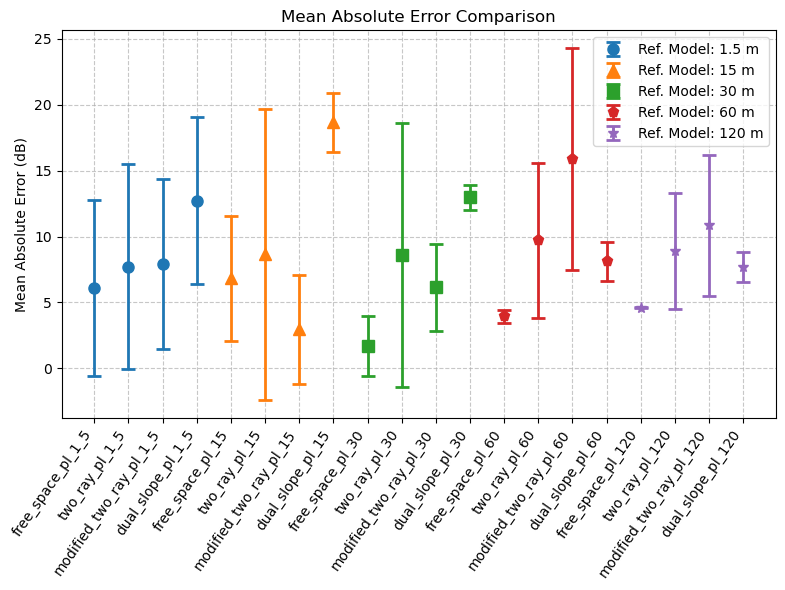

In [14]:

dfs = [df_1_5, df_15, df_30, df_60, df_120]
reference_modes = ['1.5 m', '15 m', '30 m', '60 m', '120 m']

# Define different marker styles for each reference mode
marker_styles = ['o', '^', 's', 'p', '*']

# Create subplots
fig, axes = plt.subplots(figsize=(8, 6), sharex=True)

# Error plot for Mean Absolute Error
for i, (df, marker) in enumerate(zip(dfs, marker_styles)):
    axes.errorbar(df['Model'], df['Mean Absolute Error'], yerr=df['Standard Deviation'],
                  label=f'Ref. Model: {reference_modes[i]}', linestyle='None', marker=marker, capsize=5,
                  elinewidth=2, capthick=2, markersize=8)  # Adjust thickness values as needed

axes.set_ylabel('Mean Absolute Error (dB)')
axes.legend()
axes.set_title('Mean Absolute Error Comparison')

plt.xticks(rotation=55, ha='right')
axes.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with dashed style and alpha value for transparency

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig('error_comparison.svg', format='svg', bbox_inches='tight')

# Show the plots
plt.show()
